In [16]:
import openseespy.opensees as ops
import numpy as np
import matplotlib.pyplot as plt

# Clear previous model
ops.wipe()
ops.model('Basic', '-ndm', 2, '-ndf', 3)

# Geometry and nodes
L1 = 15.0
L2 = 12.0
L3 = 5.0

# Node tags
n0 = 1
n1 = 2
n2 = 3
n3 = 4
n4 = 5

ops.node(n0, 0.0, 0.0)
ops.node(n1, 0.0, L2)
ops.node(n2, L1, L2)
ops.node(n3, L1 + L3, L2)
ops.node(n4, L1, 0.0)

# Supports
ops.fix(n0, 1, 1, 1)  # Pinned support
ops.fix(n4, 0, 1, 0)  # Roller support (vertical restraint only)

# Material and section properties
E = 29000.0
I = 800.0
A = 14.0

# Define material (elastic)
ops.uniaxialMaterial("Elastic", 1, E)

# Define section
ops.section('Elastic', 1, E, A, I)

# Geometric transformation
ops.geomTransf("Linear", 1)

# Elements (FrameElement2D analog)
ops.element("elasticBeamColumn", 1, n0, n1, A, E, I, 1)
ops.element("elasticBeamColumn", 2, n1, n2, A, E, I, 1)
ops.element("elasticBeamColumn", 3, n2, n3, A, E, I, 1)
ops.element("elasticBeamColumn", 4, n2, n4, A, E, I, 1)

# Loads
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)

# Node loads
ops.load(n0, 5.0, 0.0, 0.0)
ops.load(n3, 0.0, -15.0, 0.0)

# Distributed load on element 2 (element from n1 to n2)
# Convert distributed load to equivalent nodal loads (simple approximation)
w = -2.0
# ele load constant
ops.eleLoad('-ele',  2, '-type', '-beamUniform', w,)

# Analysis
ops.system("BandGeneral")
ops.numberer("RCM")
ops.constraints("Plain")
ops.integrator("LoadControl", 1.0)
ops.algorithm("Linear")
ops.analysis("Static")

ops.analyze(1)

# Post-processing: get nodal displacements and reactions
for node in [n0, n1, n2, n3, n4]:
    disp = ops.nodeDisp(node)
    print(f"Node {node} displacement: {disp}")

for node in [n0, n4]:
    reaction = ops.nodeReaction(node)
    print(f"Node {node} reaction: {reaction}")

Node 1 displacement: [0.0, 0.0, 0.0]
Node 2 displacement: [0.00016617045858513906, -0.0004010715555329827, -2.7695076430856522e-05]
Node 3 displacement: [0.00016617045858513852, -0.0009289777055507541, -4.50044992001421e-05]
Node 4 displacement: [0.00016617045858513852, -0.0011809398567238782, -5.3086395751866234e-05]
Node 5 displacement: [-0.0003738835318165677, 0.0, -4.500449920014223e-05]
Node 1 reaction: [0.0, 0.0, 0.0]
Node 5 reaction: [0.0, 0.0, 0.0]


<Axes: >

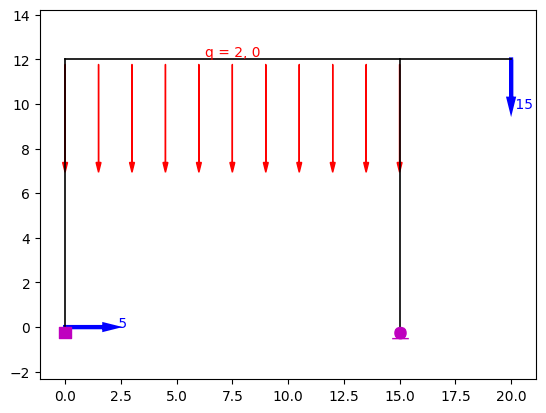

In [20]:
import opsvis
opsvis.plot_load()

Text(0.5, 1.0, 'Bending moment distribution')

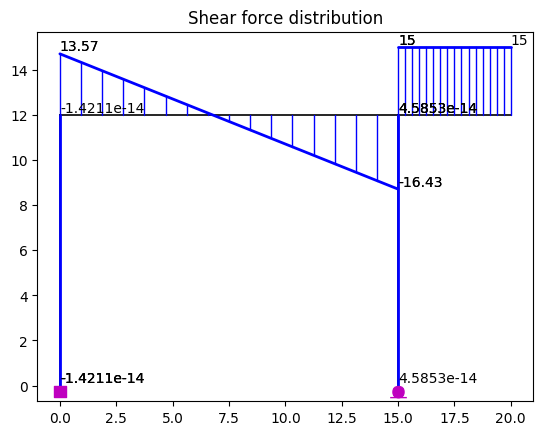

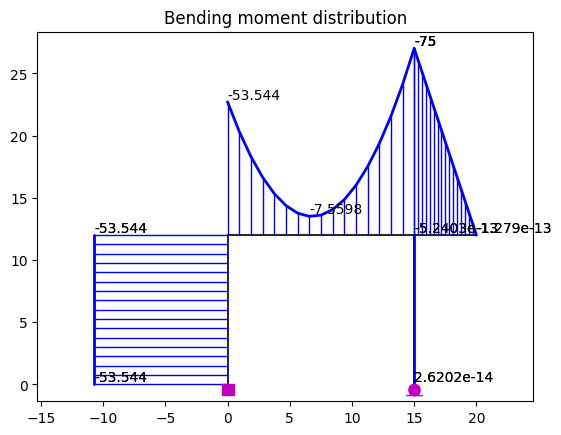

In [18]:
sfacN, sfacV, sfacM = 0.2, 0.2, 0.2

opsvis.section_force_diagram_2d('T', sfacV)
plt.title('Shear force distribution')

opsvis.section_force_diagram_2d('M', sfacM)
plt.title('Bending moment distribution')